In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.interpolate

In [2]:
data_dir = 'Data/Activity Logs'
datafile = 'Activities_Andrew.csv'
pson = 'Andrew';
fig_dir = 'Figures';
ignore_noHR = True;


run_identifiers = ["Running","Track Running","Trail Running"];
walk_identifiers = ["Walking"]
pwd = os.getcwd();
os.chdir('..')
os.chdir(data_dir);
all_activities = pd.read_csv(datafile)
os.chdir(pwd)

In [3]:
all_activities.head(10)

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,...,Min Resp,Max Resp,Stress Change,Stress Start,Stress End,Avg Stress,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,Cycling,2022-10-23 10:45:00,False,Tippecanoe County Cycling,5.34,296,00:33:08,128,169,2.1,...,--,--,--,--,--,--,00:30:20,00:39:31,638,731
1,Running,2022-10-22 08:00:30,False,Tippecanoe County - Purdue half marathon,13.14,"1,485",01:38:55,181,190,5.0,...,--,--,--,--,--,--,01:38:51,01:38:55,606,720
2,Running,2022-10-22 07:31:03,False,Tippecanoe County Running,0.60,71,00:05:47.2,150,173,1.5,...,--,--,--,--,--,--,00:05:45.4,00:05:47.2,688,703
3,Running,2022-10-21 10:12:28,False,Tippecanoe County Running,2.52,287,00:19:57,169,184,3.1,...,--,--,--,--,--,--,00:19:56,00:19:57,706,731
4,Running,2022-10-20 09:44:59,False,Tippecanoe County Running,2.06,222,00:15:22,150,189,3.0,...,--,--,--,--,--,--,00:15:19,00:16:31,703,723
5,Indoor Rowing,2022-10-19 19:47:46,False,Indoor Rowing,"2,000",80,00:08:21.2,129,182,1.3,...,--,--,--,--,--,--,00:08:15,00:08:21.2,--,--
6,Running,2022-10-17 09:17:48,False,Tippecanoe County Running,5.05,569,00:39:29,171,184,3.9,...,--,--,--,--,--,--,00:39:27,00:39:29,674,709
7,Running,2022-10-16 16:29:01,False,Tippecanoe County Running,3.12,353,00:25:23,163,185,3.2,...,--,--,--,--,--,--,00:25:21,00:25:24,675,708
8,Running,2022-10-15 12:31:55,False,Tippecanoe County Running,8.07,988,01:10:01,173,190,4.6,...,--,--,--,--,--,--,01:09:58,01:10:06,673,713
9,Running,2022-10-13 20:10:56,False,West Lafayette Running,1.54,191,00:13:25,159,174,2.8,...,--,--,--,--,--,--,00:13:21,00:15:17,622,638


In [4]:
all_activities = all_activities.replace(',','', regex=True) #make sure no commas in numeric data
all_activities = all_activities.replace('--',None, regex=True) #convert any -- to NaN to avoid crashes

all_activities['Calories'] = all_activities['Calories'].astype(float)
all_activities['Distance'] = all_activities['Distance'].astype(float)
all_activities['Avg HR'] = all_activities['Avg HR'].astype(float)
all_activities['Max HR'] = all_activities['Max HR'].astype(float)
all_activities['Time'] = all_activities['Time'].str.split(':').apply(lambda x: float(x[0]) * 60 + float(x[1])+float(x[2])/60)

if ignore_noHR:
    all_activities = all_activities[all_activities["Avg HR"]!=0]
    all_activities = all_activities[all_activities["Avg HR"]!=None]

print('Total Activities Loaded: ' + str(all_activities.shape[0]))

runs = all_activities.loc[all_activities["Activity Type"].isin(run_identifiers)];
walks = all_activities.loc[all_activities["Activity Type"].isin(walk_identifiers)];

#handle runs not logged in Miles...but Garmin not providing Units. 
#Assume any Track Running activity needs to be converted from meters to miles.

runs.loc[all_activities["Activity Type"] == "Track Running", "Distance"] = runs.loc[all_activities["Activity Type"] == "Track Running", "Distance"]/1609.34;


print('Total Runs Loaded: ' + str(runs.shape[0]))
print('Total Walks Loaded: ' + str(walks.shape[0]))

runs.head(20)


Total Activities Loaded: 955
Total Runs Loaded: 537
Total Walks Loaded: 23


/home/asivapr/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,...,Min Resp,Max Resp,Stress Change,Stress Start,Stress End,Avg Stress,Moving Time,Elapsed Time,Min Elevation,Max Elevation
1,Running,2022-10-22 08:00:30,False,Tippecanoe County - Purdue half marathon,13.140000,1485.0,98.916667,181.0,190.0,5.0,...,--,--,--,--,--,--,01:38:51,01:38:55,606,720
2,Running,2022-10-22 07:31:03,False,Tippecanoe County Running,0.600000,71.0,5.786667,150.0,173.0,1.5,...,--,--,--,--,--,--,00:05:45.4,00:05:47.2,688,703
3,Running,2022-10-21 10:12:28,False,Tippecanoe County Running,2.520000,287.0,19.950000,169.0,184.0,3.1,...,--,--,--,--,--,--,00:19:56,00:19:57,706,731
4,Running,2022-10-20 09:44:59,False,Tippecanoe County Running,2.060000,222.0,15.366667,150.0,189.0,3.0,...,--,--,--,--,--,--,00:15:19,00:16:31,703,723
6,Running,2022-10-17 09:17:48,False,Tippecanoe County Running,5.050000,569.0,39.483333,171.0,184.0,3.9,...,--,--,--,--,--,--,00:39:27,00:39:29,674,709
7,Running,2022-10-16 16:29:01,False,Tippecanoe County Running,3.120000,353.0,25.383333,163.0,185.0,3.2,...,--,--,--,--,--,--,00:25:21,00:25:24,675,708
8,Running,2022-10-15 12:31:55,False,Tippecanoe County Running,8.070000,988.0,70.016667,173.0,190.0,4.6,...,--,--,--,--,--,--,01:09:58,01:10:06,673,713
9,Running,2022-10-13 20:10:56,False,West Lafayette Running,1.540000,191.0,13.416667,159.0,174.0,2.8,...,--,--,--,--,--,--,00:13:21,00:15:17,622,638
10,Track Running,2022-10-13 19:37:36,False,West Lafayette - 6x800m 2 min rest,3.342985,388.0,28.750000,155.0,197.0,3.4,...,--,--,--,--,--,--,00:27:30,00:28:45,625,630
11,Running,2022-10-13 19:31:32,False,West Lafayette Running,0.510000,59.0,4.340000,124.0,145.0,1.5,...,--,--,--,--,--,--,00:04:19,00:04:20.4,626,634


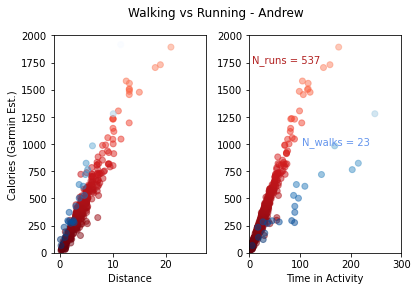

In [5]:
%matplotlib inline

os.chdir(fig_dir);
ax1 = plt.subplot(1,2,1)
plt.scatter(x = runs["Distance"], y = runs["Calories"], c = runs["Calories"], cmap=plt.get_cmap('Reds_r'),alpha = .5)
plt.scatter(x = walks["Distance"], y = walks["Calories"], c = walks["Calories"], cmap=plt.get_cmap('Blues_r'),alpha = .5)
plt.xlabel('Distance')
plt.ylabel('Calories (Garmin Est.)');


ax2 = plt.subplot(1,2,2, sharey = ax1)
plt.scatter(x = runs["Time"], y = runs["Calories"], c = runs["Calories"], cmap=plt.get_cmap('Reds_r'),alpha = .5)
plt.scatter(x = walks["Time"], y = walks["Calories"], c = walks["Calories"], cmap=plt.get_cmap('Blues_r'),alpha = .5)
plt.text(x=5, y=1750, s="N_runs = " + str(runs.shape[0]),c = 'firebrick') #hardcoded can fix this later
plt.text(x=105, y=1000, s="N_walks = " + str(walks.shape[0]), c = 'cornflowerblue') #hardcoded can fix this later
plt.xlim([0,300])
box = ax2.get_position()
box.x0 = box.x0 + 0.03
box.x1 = box.x1 + 0.03
ax2.set_position(box)
plt.xlabel('Time in Activity')
plt.suptitle('Walking vs Running - ' + pson)
plt.ylim([0,2000]);
plt.savefig(pson+'_walkrun.jpg',dpi = 500)

os.chdir(pwd);

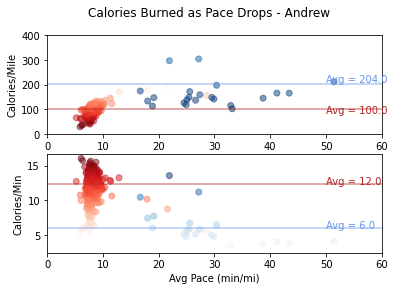

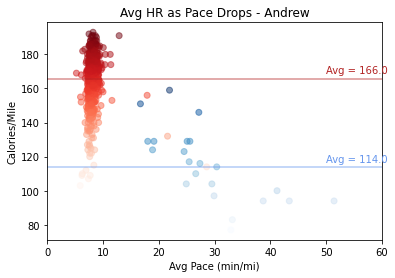

In [6]:
#Average Calories/Mile burned by Pace

pace_r = runs["Time"]/runs["Distance"];
calspmi_r = runs["Calories"]/runs["Distance"];
calspmin_r = runs["Calories"]/runs["Time"];
avg_hr_r = runs["Avg HR"];

pace_w = walks["Time"]/walks["Distance"];
calspmi_w = walks["Calories"]/walks["Distance"];
calspmin_w = walks["Calories"]/walks["Time"];
avg_hr_w = walks["Avg HR"];


r_meancalspmi = np.ma.masked_invalid(calspmi_r).mean();
w_meancalspmi = np.ma.masked_invalid(calspmi_w).mean();

r_meancalspmin = np.ma.masked_invalid(calspmin_r).mean();
w_meancalspmin = np.ma.masked_invalid(calspmin_w).mean();

r_avg_hr = np.ma.masked_invalid(avg_hr_r).mean();
w_avg_hr = np.ma.masked_invalid(avg_hr_w).mean();

os.chdir(fig_dir);

ax1 = plt.subplot(2,1,1);
plt.scatter(pace_r, calspmi_r, c = calspmi_r, cmap=plt.get_cmap('Reds_r'), alpha = .5)
plt.plot(np.arange(0,61),np.ones(61)*r_meancalspmi,'firebrick',linewidth=1.5, alpha = .5)
plt.text(x=50, y=r_meancalspmi-15, s="Avg = " + str(np.round(r_meancalspmi)),c = 'firebrick') #hardcoded can fix this later
plt.xlabel('Avg Pace (min/mi)');
plt.ylabel('Calories/Mile');

plt.scatter(pace_w, calspmi_w, c = calspmi_w, cmap=plt.get_cmap('Blues_r'), alpha = .5)
plt.plot(np.arange(0,61),np.ones(61)*w_meancalspmi,'cornflowerblue', linewidth=1.5, alpha = .5)
plt.text(x=50, y=w_meancalspmi+8, s="Avg = " + str(np.round(w_meancalspmi)),c = 'cornflowerblue') #hardcoded can fix this later
plt.xlim([3,60])

plt.ylim([0,400])

ax2 = plt.subplot(2,1,2, sharex=ax1);
plt.scatter(pace_r, calspmin_r, c = calspmin_r, cmap=plt.get_cmap('Reds'), alpha = .5)
plt.plot(np.arange(0,61),np.ones(61)*r_meancalspmin,'firebrick',linewidth=1.5, alpha = .5)
plt.text(x=50, y=r_meancalspmin, s="Avg = " + str(np.round(r_meancalspmin)),c = 'firebrick') #hardcoded can fix this later
plt.xlabel('Avg Pace (min/mi)');
plt.ylabel('Calories/Min');

plt.scatter(pace_w, calspmin_w, c = calspmin_w, cmap=plt.get_cmap('Blues'), alpha = .5)
plt.plot(np.arange(0,61),np.ones(61)*w_meancalspmin,'cornflowerblue', linewidth=1.5, alpha = .5)
plt.text(x=50, y=w_meancalspmin, s="Avg = " + str(np.round(w_meancalspmin)),c = 'cornflowerblue') #hardcoded can fix this later
plt.xlim([0,60])
plt.suptitle('Calories Burned as Pace Drops - '+pson)
plt.savefig(pson+'_caloriepace.jpg',dpi = 500)


fig = plt.figure()
plt.scatter(pace_r, avg_hr_r, c = avg_hr_r, cmap=plt.get_cmap('Reds'), alpha = .5)
plt.text(x=50, y=r_avg_hr+3, s="Avg = " + str(np.round(r_avg_hr)),c = 'firebrick') #hardcoded can fix this later
plt.plot(np.arange(0,61),np.ones(61)*r_avg_hr,'firebrick',linewidth=1.5, alpha = .5)
plt.scatter(pace_w, avg_hr_w, c = avg_hr_w, cmap=plt.get_cmap('Blues'), alpha = .5)
plt.text(x=50, y=w_avg_hr+3, s="Avg = " + str(np.round(w_avg_hr)),c = 'cornflowerblue') #hardcoded can fix this later
plt.plot(np.arange(0,61),np.ones(61)*w_avg_hr,'cornflowerblue',linewidth=1.5, alpha = .5)
plt.xlabel('Avg Pace (min/mi)');
plt.ylabel('Calories/Mile');
plt.xlim([0,60])
plt.title('Avg HR as Pace Drops - '+pson)
plt.savefig(pson+'_hrpace.jpg',dpi = 500)


os.chdir(pwd)
# ax = plt.axes()
# plt.scatter(pace, calspmi, c = calspmi, alpha = .5)
# plt.plot(np.arange(0,20),np.ones(20)*np.ma.masked_invalid(r_avg_hr).mean(),'firebrick')
# plt.xlabel('Avg Pace (min/mi)');
# plt.ylabel('Calories/Mile');
# # plt.xlim([4,13])
# # plt.ylim([0,200])
# ax.invert_xaxis();
# plt.show()

# plt.figure()
# plt.scatter(pace, avg_hr, c = avg_hr, alpha = .5)
# plt.xlabel('Avg Pace (min/mi)');
# plt.ylabel('Heart Rate');
# # plt.xlim([4,13])
# plt.show()
